<a href="https://colab.research.google.com/github/AleksandraBelousova/Sunspot-Data-Analysis-and-Visualization/blob/main/Daily_Sun_Spot_Data_(1818_to_2019).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!gdown https://drive.google.com/uc?id=1-F0ayUqgLc-M-Q7NWvVqsGqCJeeEcGA3

Downloading...
From: https://drive.google.com/uc?id=1-F0ayUqgLc-M-Q7NWvVqsGqCJeeEcGA3
To: /content/sunspot_data.csv.zip
100% 697k/697k [00:00<00:00, 122MB/s]


In [23]:
import zipfile
import os
with zipfile.ZipFile('sunspot_data.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [45]:
def extract(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Extracted data:\n{df.head()}")
        print(f"Columns in the data: {df.columns.tolist()}")
        return df.replace(-1, np.nan)
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None

def transform(df):
    if df is None:
        raise ValueError("DataFrame is None, cannot transform.")
    if 'Number of Sunspots' not in df.columns:
        print("Available columns in the DataFrame:", df.columns)
        raise KeyError("Column 'Number of Sunspots' does not exist in the DataFrame.")
    df = df.dropna(subset=['Number of Sunspots']).copy()
    df['log_sunspots'] = np.log1p(df['Number of Sunspots'])
    print(f"Transformed data:\n{df.head()}")
    return df

    df = df.dropna(subset=['Number of Sunspots'])
    df['log_sunspots'] = np.log1p(df['Number of Sunspots'])
    print(f"Transformed data:\n{df.head()}")
    return df

def load(df, db_path='sqlite:///sun_spot.db'):
    if df is None:
        print("No data to load.")
        return
    engine = create_engine(db_path)
    df.to_sql('sunspot_data', con=engine, if_exists='replace', index=False)
    print("Data loaded into database.")

def run_etl(file_path):
    data = extract(file_path)
    transformed_data = transform(data)
    load(transformed_data)

run_etl('/content/data/sunspot_data.csv')

Extracted data:
   Unnamed: 0  Year  Month  Day  Date In Fraction Of Year  Number of Sunspots  \
0           0  1818      1    1                  1818.001                  -1   
1           1  1818      1    2                  1818.004                  -1   
2           2  1818      1    3                  1818.007                  -1   
3           3  1818      1    4                  1818.010                  -1   
4           4  1818      1    5                  1818.012                  -1   

   Standard Deviation  Observations  Indicator  
0                -1.0             0          1  
1                -1.0             0          1  
2                -1.0             0          1  
3                -1.0             0          1  
4                -1.0             0          1  
Columns in the data: ['Unnamed: 0', 'Year', 'Month', 'Day', 'Date In Fraction Of Year', 'Number of Sunspots', 'Standard Deviation', 'Observations', 'Indicator']
Transformed data:
    Unnamed: 0  Year  Mo

   Unnamed: 0  Year  Month  Day  Date In Fraction Of Year  Number of Sunspots  \
0           7  1818      1    8                  1818.021                65.0   
1          12  1818      1   13                  1818.034                37.0   
2          16  1818      1   17                  1818.045                77.0   
3          17  1818      1   18                  1818.048                98.0   
4          18  1818      1   19                  1818.051               105.0   

   Standard Deviation  Observations  Indicator  log_sunspots  
0                10.2             1          1      4.189655  
1                 7.7             1          1      3.637586  
2                11.1             1          1      4.356709  
3                12.6             1          1      4.595120  
4                13.0             1          1      4.663439  


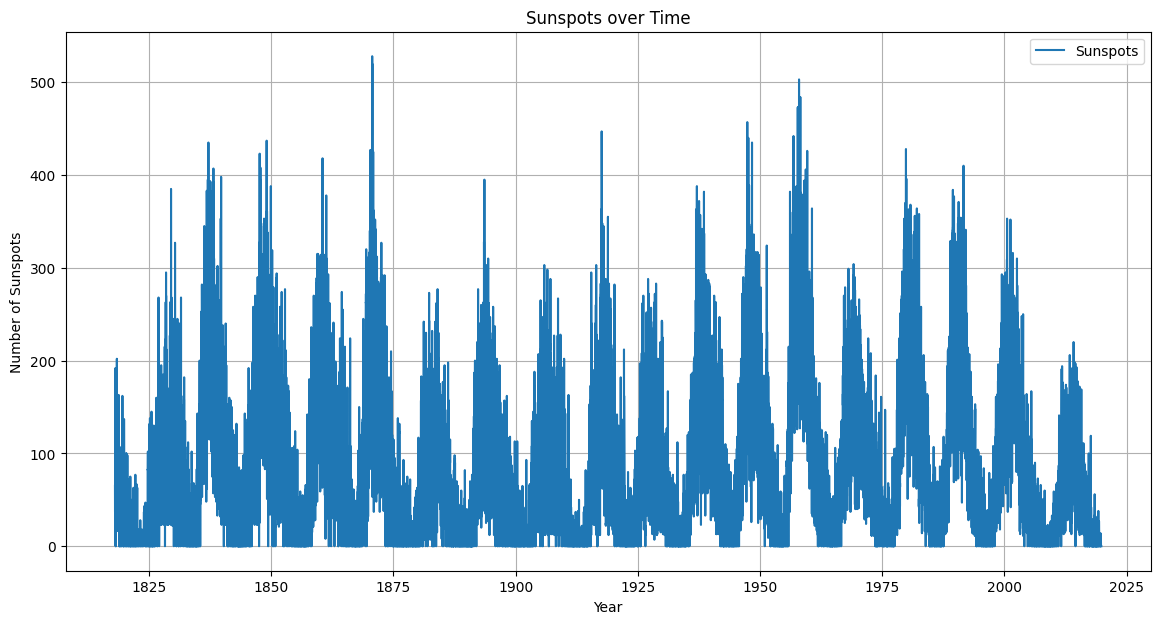

In [46]:
def load_data_from_db(db_path='sqlite:///sun_spot.db'):
    engine = create_engine(db_path)
    query = "SELECT * FROM sunspot_data"
    df = pd.read_sql(query, con=engine)
    return df

def plot_sunspots(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date In Fraction Of Year'], df['Number of Sunspots'], label='Sunspots')
    plt.xlabel('Year')
    plt.ylabel('Number of Sunspots')
    plt.title('Sunspots over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_sunspots():
    df = load_data_from_db()
    print(df.head())
    plot_sunspots(df)

analyze_sunspots()

   Unnamed: 0  Year  Month  Day  Date In Fraction Of Year  Number of Sunspots  \
0           7  1818      1    8                  1818.021                65.0   
1          12  1818      1   13                  1818.034                37.0   
2          16  1818      1   17                  1818.045                77.0   
3          17  1818      1   18                  1818.048                98.0   
4          18  1818      1   19                  1818.051               105.0   

   Standard Deviation  Observations  Indicator  log_sunspots  Timestamp  
0                10.2             1          1      4.189655 1818-01-08  
1                 7.7             1          1      3.637586 1818-01-13  
2                11.1             1          1      4.356709 1818-01-17  
3                12.6             1          1      4.595120 1818-01-18  
4                13.0             1          1      4.663439 1818-01-19  


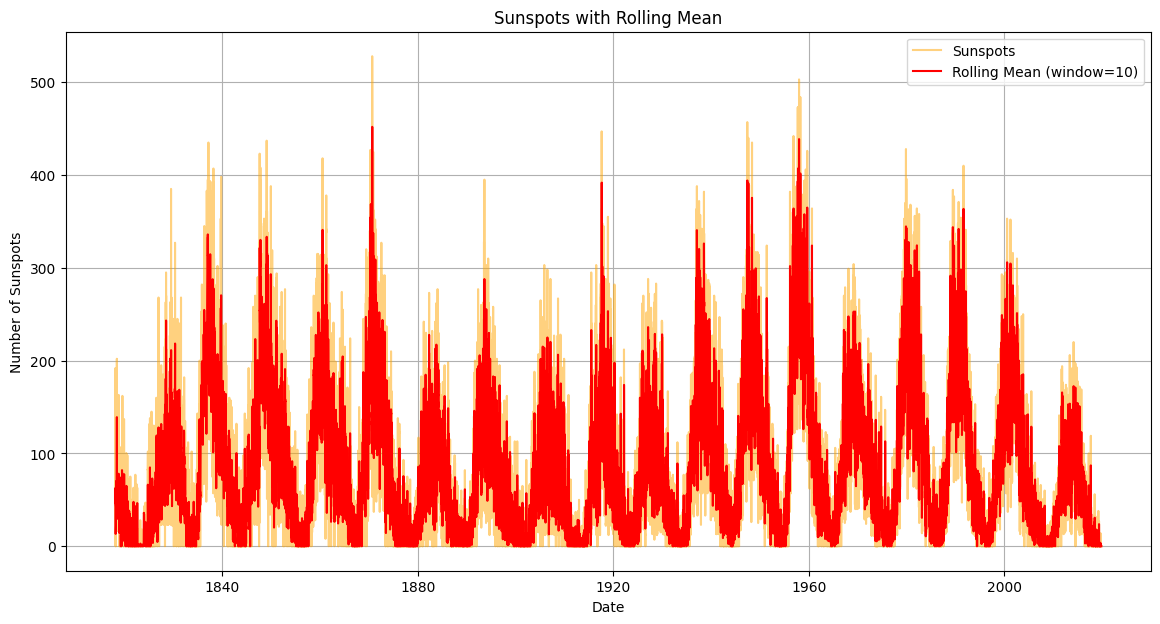

In [47]:
def load_data_from_db(db_path='sqlite:///sun_spot.db'):
    engine = create_engine(db_path)
    query = "SELECT * FROM sunspot_data"
    df = pd.read_sql(query, con=engine)
    return df
def create_timestamp(df):
    df['Timestamp'] = pd.to_datetime({'year': df['Year'], 'month': df['Month'], 'day': df['Day']})
    return df
def plot_sunspots(df):
    df['Rolling Mean'] = df['Number of Sunspots'].rolling(window=10, center=True).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(df['Timestamp'], df['Number of Sunspots'], label='Sunspots', color='orange', alpha=0.5)
    plt.plot(df['Timestamp'], df['Rolling Mean'], label='Rolling Mean (window=10)', color='red')

    plt.xlabel('Date')
    plt.ylabel('Number of Sunspots')
    plt.title('Sunspots with Rolling Mean')
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_sunspots():
    df = load_data_from_db()
    df = create_timestamp(df)
    print(df.head())
    plot_sunspots(df)

analyze_sunspots()